# Context
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

# Attribute Information
1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

### Acknowledgements
(Confidential Source) - Use only for educational purposes
If you use this dataset in your research, please credit the author.

Other Datasets
Hepatitis C Dataset: LINK

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Data getting, cleaning, and exploring
import wrangle as w
import explore as ex

# Python without these is hard
import pandas as pd
import numpy as np
from scipy import stats

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.impute import SimpleImputer, KNNImputer
# Regression Modeling
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df[df.bmi.isnull()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [6]:
df.set_index('id', inplace=True)

In [7]:
quant_cols = ['age','avg_glucose_level','bmi']
bin_cols = ['hypertension','heart_disease']
target = 'stroke'
cat_cols = list(df.columns.drop(quant_cols, bin_cols))
cat_cols

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'stroke']

In [8]:
ex.value_counts(df, cat_cols)


___________

gender

___________

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

___________

hypertension

___________

0    4612
1     498
Name: hypertension, dtype: int64

___________

heart_disease

___________

0    4834
1     276
Name: heart_disease, dtype: int64

___________

ever_married

___________

Yes    3353
No     1757
Name: ever_married, dtype: int64

___________

work_type

___________

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

___________

Residence_type

___________

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

___________

smoking_status

___________

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

___________

stroke

___________

0    4861
1     249
Name: stroke, dtype: int64


In [9]:
ex.missing_zero_values_table(df)

Your selected dataframe has 11 columns and 5110 Rows.
There are 1 columns that have NULL values.


,Zero Values,NULL Values,% of Total NULL Values,Total Zero's plus NULL Values,% Total Zero's plus NULL Values,Data Type
bmi,0,201,3.9,201,3.9,float64
gender,0,0,0.0,0,0.0,object
age,0,0,0.0,0,0.0,float64
hypertension,4612,0,0.0,4612,90.3,int64
heart_disease,4834,0,0.0,4834,94.6,int64
ever_married,0,0,0.0,0,0.0,object
work_type,0,0,0.0,0,0.0,object
Residence_type,0,0,0.0,0,0.0,object
avg_glucose_level,0,0,0.0,0,0.0,float64
smoking_status,0,0,0.0,0,0.0,object


In [10]:
ex.missing_columns(df)

,total_missing_cols,num_rows,percent_cols_missing,percent_rows_affected
0,1,201,9.09,3.93
1,0,4909,0.00,96.07


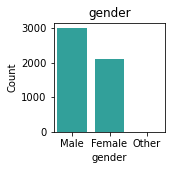

        gender  Count  Percent
Female    Male   2994    58.59
Male    Female   2115    41.39
Other    Other      1     0.02
_________________________________________________________________


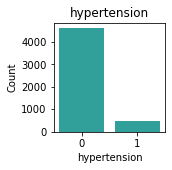

   hypertension  Count  Percent
0             0   4612    90.25
1             1    498     9.75
_________________________________________________________________


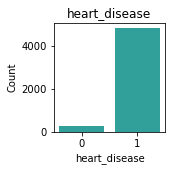

   heart_disease  Count  Percent
0              1   4834     94.6
1              0    276      5.4
_________________________________________________________________


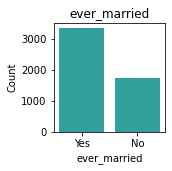

    ever_married  Count  Percent
Yes          Yes   3353    65.62
No            No   1757    34.38
_________________________________________________________________


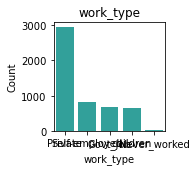

                   work_type  Count  Percent
Private              Private   2925    57.24
Self-employed  Self-employed    819    16.03
children            Govt_job    687    13.44
Govt_job            children    657    12.86
Never_worked    Never_worked     22     0.43
_________________________________________________________________


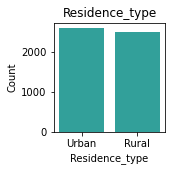

      Residence_type  Count  Percent
Urban          Urban   2596     50.8
Rural          Rural   2514     49.2
_________________________________________________________________


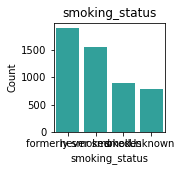

                  smoking_status  Count  Percent
never smoked     formerly smoked   1892    37.03
Unknown             never smoked   1544    30.22
formerly smoked           smokes    885    17.32
smokes                   Unknown    789    15.44
_________________________________________________________________


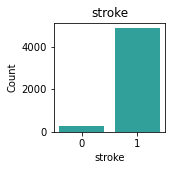

   stroke  Count  Percent
0       1   4861    95.13
1       0    249     4.87
_________________________________________________________________


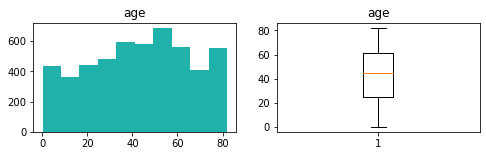

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64


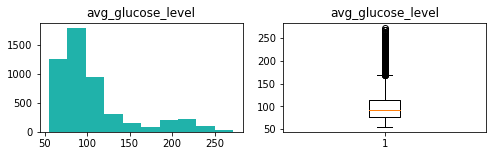

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64


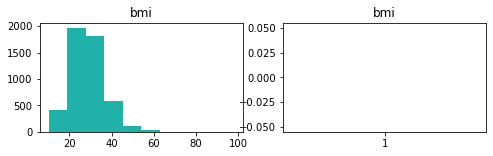

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64


In [11]:
ex.explore_univariate(df, cat_cols, quant_cols)

In [12]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [13]:
features = ['bmi','age','avg_glucose_level','heart_disease','hypertension']

In [14]:
w.impute_knn(df, features, 4)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,32.225,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,26.725,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000,never smoked,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600,never smoked,0


In [15]:
train, validate, test = w.train_validate_test_split(df, target, seed=42)

In [16]:
quant_cols2 = ['avg_glucose_level', 'bmi']

In [17]:
train, validate, test = w.scale_my_data(train, validate, test, quant_cols)

hypertension 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=322168.0, pvalue=1.2567006838996058e-10)
        chi2       p-value  degrees of freedom
0  39.508251  3.266762e-10                   1

expected:
              0           1
0  2462.263544  125.736456
1   259.736456   13.263544


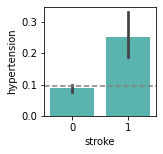


_____________________

heart_disease 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=184810.0, pvalue=1.9726071753895014e-10)
       chi2       p-value  degrees of freedom
0  38.09415  6.741193e-10                   1

expected:
              0           1
0  2575.481999  131.518001
1   146.518001    7.481999


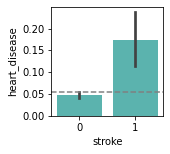


_____________________

age 
____________________



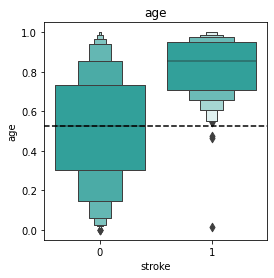

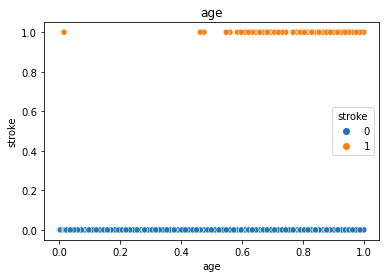

stroke            0           1
count   2722.000000  139.000000
mean       0.512886    0.822104
std        0.273150    0.151833
min        0.000000    0.015137
25%        0.304199    0.707031
50%        0.523926    0.853516
75%        0.731445    0.951172
max        1.000000    1.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.24606603601358915, pvalue=1.0100123454668368e-40)

____________________

avg_glucose_level 
____________________



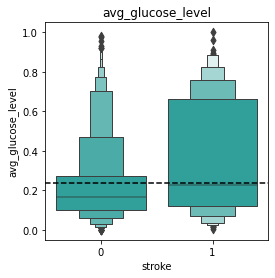

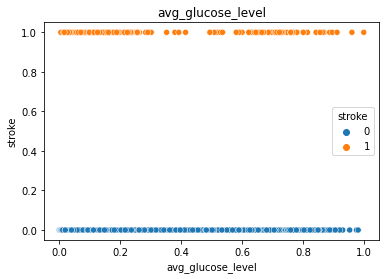

stroke            0           1
count   2722.000000  139.000000
mean       0.231305    0.359479
std        0.204191    0.292450
min        0.000000    0.004570
25%        0.101491    0.118895
50%        0.167459    0.228003
75%        0.270820    0.660696
max        0.981627    1.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.07823254666884866, pvalue=2.8003835238908225e-05)

____________________

bmi 
____________________



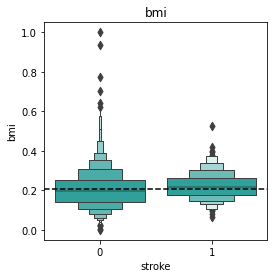

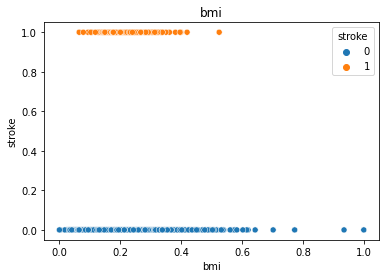

stroke            0           1
count   2722.000000  139.000000
mean       0.205051    0.222965
std        0.093733    0.071975
min        0.000000    0.064890
25%        0.142526    0.175261
50%        0.194670    0.215527
75%        0.253766    0.261877
max        1.000000    0.524913 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.0592534692417689, pvalue=0.001520358005297463)

____________________



In [18]:
ex.explore_bivariate(train, 'stroke', 'stroke', bin_cols, quant_cols)

In [19]:
train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
14249,Female,0.015137,0,0,No,children,Urban,0.119703,0.085747,Unknown,0
33585,Female,0.780273,0,0,Yes,Private,Rural,0.900563,0.186559,Unknown,0
13540,Female,0.719238,0,0,Yes,Self-employed,Rural,0.279568,0.183082,Unknown,0
22896,Female,0.658203,0,0,Yes,Private,Rural,0.249977,0.376593,formerly smoked,0
5863,Female,0.865723,0,0,Yes,Private,Urban,0.857215,0.186559,never smoked,0


NameError: name 'tra' is not defined